# $\varepsilon$-greedy

In this exercise, we will be experimenting with the Multi-armed bandit problem with $\varepsilon$-greedy algorithm.

## Setup

Consider an unstructured bandit problem. Suppose that we have $k$ arms, each with random reward at time $t$ given by $rew[t] = avg[t] + \eta[t]$ where $\eta[t]$ is drawn from an i.i.d. standard Gaussian distribution. Note that we only require $\eta[t]$ to be sub-Gaussian for the analysis to go through.

The following code should be implemented to capture this setup.

# Reward function

Question: Implement the reward function described in the setup. Specifically, given a $k$- dimensional vector 'avg', return $k$- dimensional vector 'rew' such that $rew[t] = avg[t] + \epsilon[t]$ where $\epsilon[t] \sim \mathcal{N}(0,I)$ where $I$ is the identity matrix of size $k \times k$.

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
def get_reward(avg):
    rew = avg + np.random.multivariate_normal(np.zeros(len(avg)),np.identity(len(avg)))
    return rew

## Algorithm review


Recall there are three parameters of interest in the $\varepsilon$-greedy algoritm: $(n, k, \varepsilon[t]),$ where $n$ is the time horizon, $k$ is the number of arms, and $\varepsilon[t]$ is an algorithm parameter. Please refer to the lecture notes and the text book for details.

The parameter to set: $\varepsilon[t]$ which is the probability of choosing an arm uniformly at random at time $t$. (Hint: use exercise $(6.7 - b)$ in the book to set the values of $\varepsilon[t]$)

1. First choose each arm once.
2. Subsequently, choose the arm with the highest empirical mean reward estimate with a probability $1 - \varepsilon[t]$ or otherwise choose an arm
uniformly at random.

## Goal of this exercise

Implement the following using the template provided below. Please use the variable names suggested in the comments.

1. Basic $\varepsilon$-greedy algorithm implementation
2. Plot the expected cumulative regret of the $\varepsilon$-greedy algorithm vs. horizon ($n$).
3. The cumulative regret is expected to be logarithmic against the horizon. To check that this is case, plot the logarithm of the expected cumulative regret of the $\varepsilon$-greedy algorithm vs. horizon ($n$). (Hint: use the semilogx function in matplotlib.pyplot) 

# Import Dependencies

## $\varepsilon$-greedy

Question:

Implement $\varepsilon$-greedy using the skeleton below. The initialization part is done. Fill out the rest of the skeleton.

In [3]:
class egreedy():
    def __init__(self, avg): ## Initialization
        self.means = avg
        self.num_arms = avg.size
        self.best_arm = np.argmax(avg)
        self.C = 1
        sort = np.sort(avg)[::-1]
        self.delta = sort[0] - sort[1]
        self.restart()

    def restart(self): ## Restart the algorithm: Reset the time index to zero and epsilon to 1 (done), the values of the empirical means, 
                     ## number of pulls, and cumulative regret to zero.
        self.time = 0.0
        self.eps = 1
        self.emp_means = np.zeros(self.num_arms)
        self.num_pulls = np.zeros(self.num_arms)
        self.cum_reg = [0]

    def get_best_arm(self):## For each time index, find the best arm according to e-greedy   
        if np.random.rand() >= self.eps:
            return np.argmax(self.emp_means)
        else:
            return np.random.choice(self.num_arms)

    def update_stats(self, rew, arm): ## Update the empirical means, the number of pulls, epsilon, and increment the time index
        self.time += 1.0
        self.num_pulls[arm] += 1.0
        self.emp_means[arm] = (self.emp_means[arm] * (self.num_pulls[arm] - 1.0) + rew[arm])/self.num_pulls[arm]
        self.eps = min(1,(self.num_arms*self.C)/(self.time * (self.delta**2)))
    
    def update_reg(self,rew_vec,arm): ## Update the cumulative regret
        self.cum_reg += [self.cum_reg[-1] + rew_vec[self.best_arm] - rew_vec[arm]]

    def iterate(self, rew_vec): ## Iterate the algorithm
        arm = self.get_best_arm()
        self.update_stats(rew_vec, arm)
        self.update_reg(rew_vec, arm)

# Experiment Function
The following code runs the $\varepsilon$-greedy algorithm for multiple instances. In the code below, num_inst is the number of instances, and num_iter is the time horizon.

In [4]:
def run_algo(avg, num_iter, num_inst):
    
    reg = np.zeros((num_inst, num_iter))
    algo = egreedy(avg)
    
    for j in range(num_inst):
        algo.restart()
        
        if (j+1)%10 == 0:
            print('Instance number = ', j+1)
        
        for t in range(num_iter-1):
            rew_vec = get_reward(avg)
            algo.iterate(rew_vec)
            
        reg[j,:]= np.asarray(algo.cum_reg)
        
    return reg

# Initializations
Use the following to initialize your algorithm. The value of $k$ is implicitly set to $5$ in the initialization below. (You can change the number of arms $k$ and their values in the avg vector in any manner to test your algorithm. This vector contains the actual mean rewards).

In [5]:
avg = np.asarray([0.96,0.7,0.5,0.6,0.1])
num_iter,num_inst = int(1e4),10

# Run Experiment

In [6]:
reg = run_algo(avg, num_iter, num_inst)

Instance number =  10


## Plotting the Results

Questions: 

1 - Compute the average regret over the number of instances and plot it against the horizon. Label the x-axis as time, and the y-axis as Cumulative Regret. Add a caption labeling this as 'Cumulative Regret with $\varepsilon$-greedy'.

2 - Use the semilogx function in matplotlib to check that the regret is logarithmic against horizon.

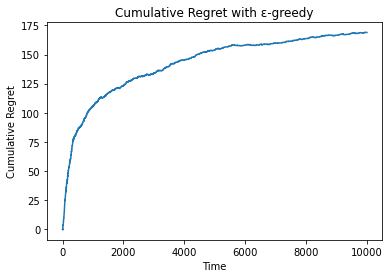

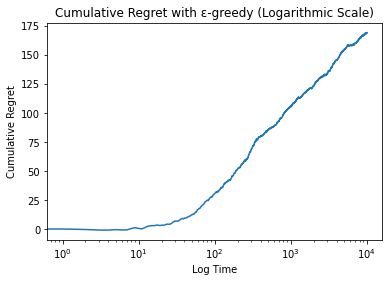

In [7]:
# 1 - Plotting the cumulative regret against time
plt.figure(figsize=(6,4))
time = np.arange(num_iter)
cum_reg = np.mean(reg, axis=0)
plt.plot(time, cum_reg)
plt.xlabel('Time')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret with ε-greedy')
plt.show()

# 2 - Checking that the regret is logarithmic against horizon
plt.figure(figsize=(6,4))
plt.semilogx(time, cum_reg)
plt.xlabel('Log Time')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret with ε-greedy (Logarithmic Scale)')
plt.show()